In [15]:
# Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Fitting 3 folds for each of 162 candidates, totalling 486 fits


<Figure size 1200x700 with 0 Axes>

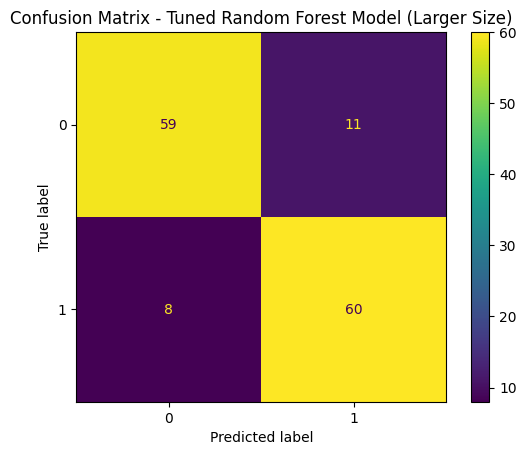

<Figure size 1200x700 with 0 Axes>

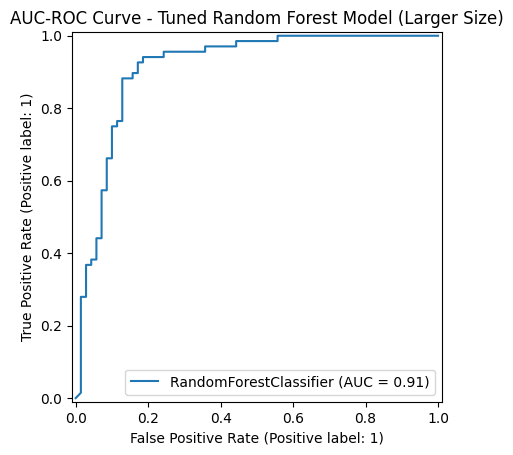

In [17]:
# Load the provided CSV file to check its contents
file_path = r'C:\Users\EvangelosNiklitsiost\OneDrive - IreckonU\Desktop\Credit Risk Project\Dataset\cc_approvals_modified.csv'
credit_data = pd.read_csv(file_path)

# Encode categorical variables
categorical_cols = ['Gender', 'MaritalStatus', 'EmploymentStatus', 'EducationLevel', 'HousingStatus', 'HasCreditCard', 'HasMortgage', 'HasOtherLoans', 'ResidentialArea', 'ApprovalStatus', 'CreditBalance', 'Debt']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    credit_data[col] = le.fit_transform(credit_data[col])
    label_encoders[col] = le

# Split data into features and target variable
X = credit_data.drop(columns=['ApprovalStatus'])  # Drop target and ID columns
y = credit_data['ApprovalStatus']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest with default hyperparameters
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])


# Set the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_best = best_rf_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Output the results
{
    'Initial Accuracy': accuracy,
    'Initial Precision': precision,
    'Initial Recall': recall,
    'Initial F1': f1,
    'Initial ROC-AUC': roc_auc,
    'Tuned Accuracy': accuracy_best,
    'Tuned Precision': precision_best,
    'Tuned Recall': recall_best,
    'Tuned F1': f1_best,
    'Tuned ROC-AUC': roc_auc_best,
    'Best Hyperparameters': best_params
}


# Get the best parameters and model
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_best = best_rf_model.predict(X_test)


<Figure size 1200x700 with 0 Axes>

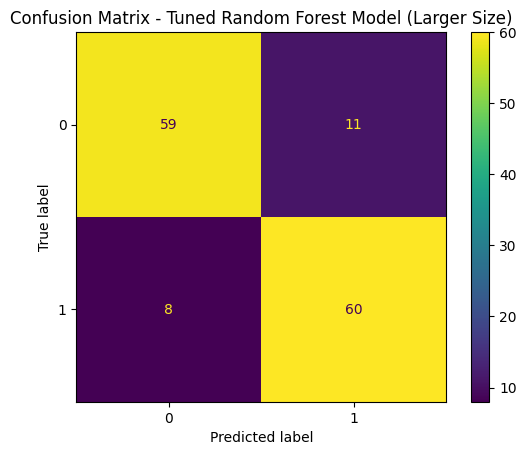

<Figure size 3000x1500 with 0 Axes>

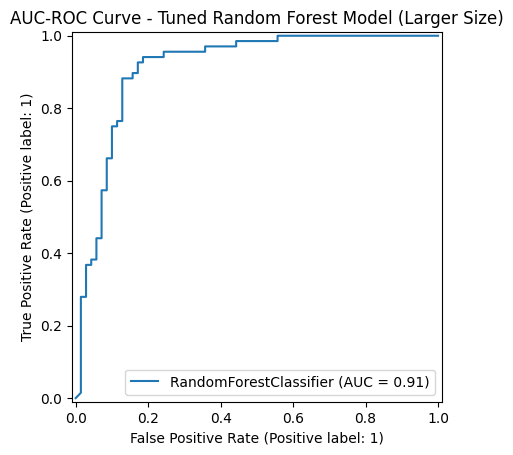

In [19]:
# Visualizing the Confusion Matrix for the best model with larger size
plt.figure(figsize=(12, 7))
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test)
plt.title("Confusion Matrix - Tuned Random Forest Model (Larger Size)")
plt.show()

# Visualizing the AUC-ROC curve for the best model with larger size
plt.figure(figsize=(30, 15))
RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test)
plt.title("AUC-ROC Curve - Tuned Random Forest Model (Larger Size)")
plt.show()